In [1]:
# load packages
import json
import pickle
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from american_option import american_option

In [3]:
# load inputs to compute the american option.
base_df = pd.read_json('json/results_stack.json', orient='index').rename(
    columns={'y_true':'S', 'y_pred':'S_pred'}
)
std_df = pd.read_json('json/hourly_residuals_in_sample.json', orient='index')
std_df.columns = pd.to_datetime(std_df.columns.date)

# fix random seed to 0
np.random.seed(0)

In [4]:
# initialize option class to 24 hour length and 100000 random paths
option = american_option(base_df, 24, 100000, std_df)

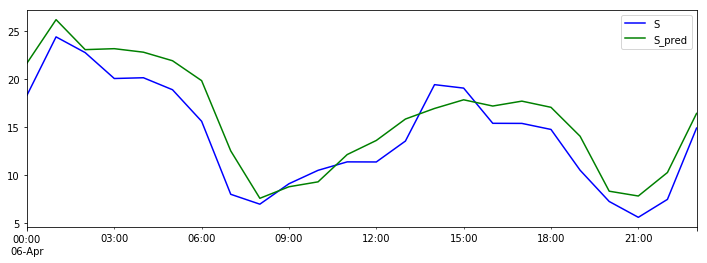

In [5]:
option.plot_real_predicted_values('2017-04-06 00:00:00')

In [6]:
df_mc = option.generate_random_paths('2017-04-06 00:00:00')

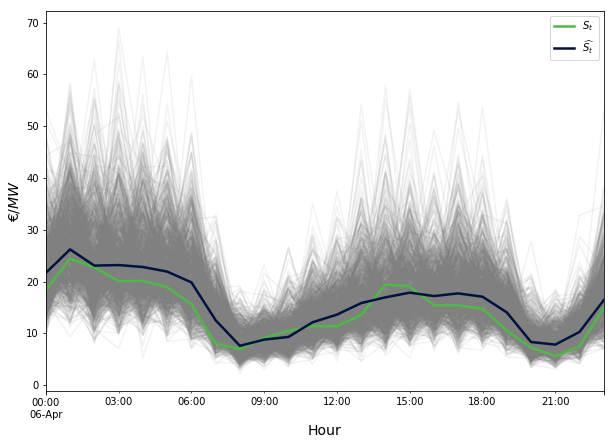

In [7]:
# this figure shows just 1000 random paths 
option.plot_montecarlo(save_bool=False)

In [8]:
# compute option value with strike K=10 and using 3 degree polynomial for LSMC
option.compute_option_value(10, 3)

24.685539935545997

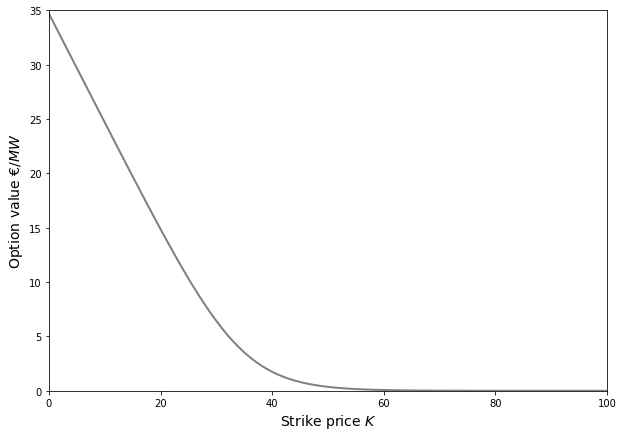

In [9]:
# option value change against strike
K = np.linspace(0,100,101)
C_list = option.compute_option_value(K,3)
option.plot_option_value_vs_strike(K, C_list, '2017-04-06', save_bool=False)